In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# importing the dataset of all the seasons

datasets=[] #list of all the datasets

root="https://raw.githubusercontent.com/ramankumar-1/football-analytics/main/datasets/"
for i in range(0,18):
    file_name=f"20{i:02d}-{i+1:02d}.csv"
    datasets.append(pd.read_csv(root+file_name))

len(datasets)

18

In [ ]:
#combining all the datasets
df=pd.concat(datasets,ignore_index=True,join="inner")
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,E0,19/08/00,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,E0,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,E0,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,E0,19/08/00,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,E0,19/08/00,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,E0,13/05/18,Newcastle,Chelsea,3,0,H,1,0,H,...,6,2,4,2,11,10,0,1,0,0
6836,E0,13/05/18,Southampton,Man City,0,1,A,0,0,D,...,3,2,1,12,8,10,3,1,0,0
6837,E0,13/05/18,Swansea,Stoke,1,2,A,1,2,A,...,11,5,6,0,12,9,1,2,0,0
6838,E0,13/05/18,Tottenham,Leicester,5,4,H,1,2,A,...,6,9,4,4,9,13,1,2,0,0


In [ ]:
# data preprocessing

df.isna().sum() # We can the data is fully clean

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HF          0
AF          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [ ]:
home_win_count=0
away_win_count=0
draw_count=0

for i in range(len(df)):
    if df.iloc[i].FTHG > df.iloc[i].FTAG:
        home_win_count+=1
    if df.iloc[i].FTHG < df.iloc[i].FTAG:
        away_win_count+=1


draw_count=len(df)-(home_win_count+away_win_count)
print(home_win_count,away_win_count,draw_count)

3176 1913 1751


([<matplotlib.patches.Wedge at 0x1e56f254b80>,
 [Text(0.12301748323114213, 1.0930995832125616, "Home Team's Win"),
  Text(-0.8726886534216935, -0.6696375991452626, "Away Team's Win"),
  Text(0.763033220288598, -0.792325882914355, 'Match Tie')],
 [Text(0.06710044539880479, 0.5962361362977607, '46.4%'),
  Text(-0.47601199277546913, -0.3652568722610523, '28.0%'),
  Text(0.41619993833923524, -0.43217775431692085, '25.6%')])

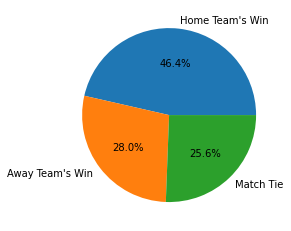

In [ ]:
# Data Visualization

labels=["Home Team's Win","Away Team's Win","Match Tie"]
sizes=[home_win_count,away_win_count,draw_count]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x15e84b65b70>,
 [Text(-0.2558794599038702, 1.069825080094547, 'Home Team Goals'),
  Text(0.25587945990386957, -1.069825080094547, 'Away Team Goals')],
 [Text(-0.13957061449302008, 0.5835409527788438, '57.5%'),
  Text(0.13957061449301975, -0.5835409527788438, '42.5%')])

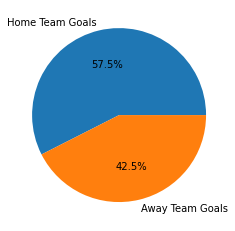

In [ ]:
# Goals Home vs Away teams

labels=["Home Team Goals","Away Team Goals"]
sizes=[sum(df.FTHG),sum(df.FTAG)]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')


In [ ]:
goals_freq={}

for i in range(len(df)):
    if df.FTHG[i]>df.FTAG[i]:
        winner_goal=df.FTHG[i]
    if df.FTAG[i]>df.FTHG[i]:
        winner_goal=df.FTAG[i]
    if winner_goal in list(goals_freq.keys()):
        goals_freq[winner_goal]+=1
    else:
        goals_freq[winner_goal]=1

goals_freq

{4: 679, 3: 1637, 2: 2584, 1: 1628, 5: 212, 6: 77, 7: 16, 8: 6, 9: 1}

<BarContainer object of 9 artists>

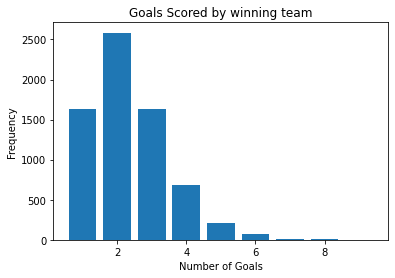

In [ ]:
plt.title("Goals Scored by winning team")
plt.xlabel("Number of Goals")
plt.ylabel("Frequency")
plt.bar(list(goals_freq.keys()),list(goals_freq.values()))

In [ ]:
goals_freq

[(1, 1628),
 (2, 2584),
 (3, 1637),
 (4, 679),
 (5, 212),
 (6, 77),
 (7, 16),
 (8, 6),
 (9, 1)]

In [ ]:
diff_freq={}

for i in range(len(df)):
    diff=abs(df.FTHG[i]-df.FTAG[i])
    if diff in list(diff_freq.keys()):
        diff_freq[diff]+=1
    else:
        diff_freq[diff]=1

diff_freq

{4: 264, 2: 1455, 0: 1751, 1: 2587, 3: 653, 6: 29, 5: 92, 7: 5, 8: 4}

<BarContainer object of 9 artists>

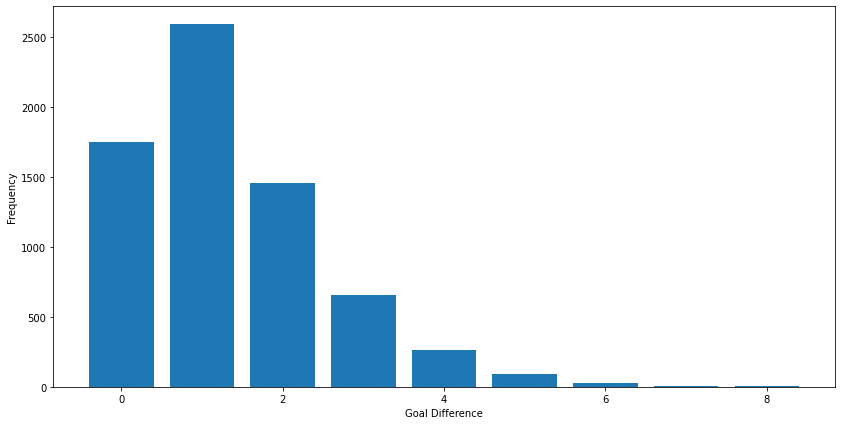

In [ ]:
plt.figure(figsize=(14,7))
plt.xlabel("Goal Difference")
plt.ylabel("Frequency")
plt.bar(list(diff_freq.keys()),list(diff_freq.values()))

In [ ]:
# No. of Wins per team

team_win_freq={}

for i in range(len(df)):
    if df.FTHG[i]>df.FTAG[i]:
        winner=df.HomeTeam[i]
    if df.FTAG[i]>df.FTHG[i]:
        winner=df.AwayTeam[i]
    if winner in list(team_win_freq.keys()):
        team_win_freq[winner]+=1
    else:
        team_win_freq[winner]=1

team_win_freq=dict(sorted(team_win_freq.items(), key=lambda x:x[1],reverse=True))
team_win_freq

# We can see that Manchester United is the most successful team

{'Man United': 573,
 'Chelsea': 545,
 'Arsenal': 526,
 'Liverpool': 461,
 'Tottenham': 430,
 'Man City': 417,
 'Everton': 351,
 'Newcastle': 299,
 'Aston Villa': 264,
 'West Ham': 263,
 'Fulham': 195,
 'Bolton': 189,
 'Blackburn': 187,
 'Southampton': 177,
 'Sunderland': 170,
 'Stoke': 161,
 'West Brom': 140,
 'Middlesbrough': 132,
 'Swansea': 122,
 'Portsmouth': 109,
 'Wigan': 109,
 'Charlton': 104,
 'Leicester': 102,
 'Birmingham': 102,
 'Crystal Palace': 86,
 'Leeds': 76,
 'Watford': 62,
 'Norwich': 58,
 'Burnley': 56,
 'Wolves': 54,
 'Hull': 51,
 'Bournemouth': 44,
 'Reading': 43,
 'Ipswich': 40,
 'QPR': 30,
 'Derby': 25,
 'Middlesboro': 16,
 'Brighton': 13,
 'Coventry': 12,
 'Blackpool': 12,
 'Sheffield United': 10,
 'Huddersfield': 9,
 'Cardiff': 8,
 'Bradford': 7}

<BarContainer object of 10 artists>

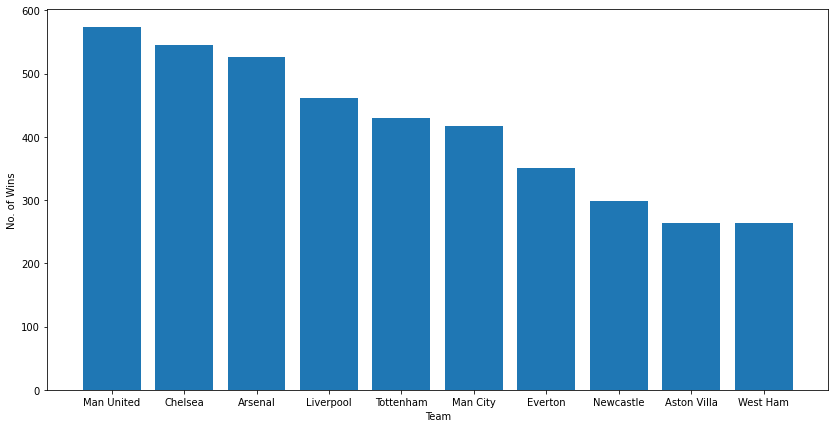

In [ ]:
plt.figure(figsize=(14,7))
plt.xlabel("Team")
plt.ylabel("No. of Wins")
plt.bar(list(team_win_freq.keys())[:10],list(team_win_freq.values())[:10])

In [ ]:
# No. of Losses per team

team_loss_freq={}

for i in range(len(df)):
    if df.FTHG[i]<df.FTAG[i]:
        loser=df.HomeTeam[i]
    if df.FTAG[i]<df.FTHG[i]:
        loser=df.AwayTeam[i]
    if loser in list(team_loss_freq.keys()):
        team_loss_freq[loser]+=1
    else:
        team_loss_freq[loser]=1

team_loss_freq=dict(sorted(team_loss_freq.items(), key=lambda x:x[1],reverse=True))
team_loss_freq

# We can see that Sunderland is the worst performing team

{'Sunderland': 351,
 'West Ham': 331,
 'Newcastle': 322,
 'Aston Villa': 314,
 'Everton': 312,
 'West Brom': 302,
 'Fulham': 279,
 'Tottenham': 277,
 'Man City': 247,
 'Blackburn': 227,
 'Bolton': 227,
 'Southampton': 216,
 'Liverpool': 213,
 'Stoke': 198,
 'Wigan': 195,
 'Middlesbrough': 193,
 'Arsenal': 169,
 'Charlton': 165,
 'Swansea': 163,
 'Portsmouth': 162,
 'Chelsea': 160,
 'Man United': 153,
 'Leicester': 146,
 'Birmingham': 145,
 'Crystal Palace': 141,
 'Hull': 135,
 'Norwich': 132,
 'Wolves': 111,
 'Burnley': 102,
 'Watford': 95,
 'Derby': 92,
 'QPR': 88,
 'Leeds': 82,
 'Reading': 74,
 'Bournemouth': 69,
 'Ipswich': 46,
 'Coventry': 32,
 'Sheffield United': 29,
 'Cardiff': 29,
 'Bradford': 28,
 'Blackpool': 25,
 'Huddersfield': 25,
 'Middlesboro': 19,
 'Brighton': 19}

<BarContainer object of 10 artists>

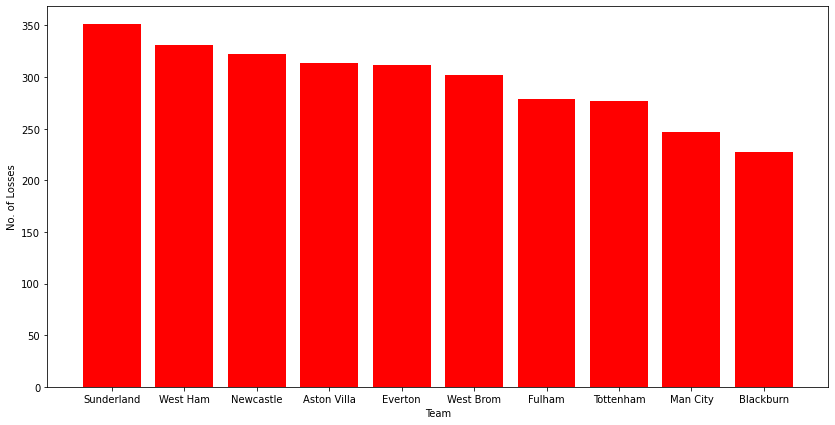

In [ ]:
plt.figure(figsize=(14,7))
plt.xlabel("Team")
plt.ylabel("No. of Losses")
plt.bar(list(team_loss_freq.keys())[:10],list(team_loss_freq.values())[:10], color="red")

([<matplotlib.patches.Wedge at 0x1e571f77c70>,
 [Text(-0.2156552152292165, 1.0786532474082857, 'Home Team Shots'),
  Text(0.2156552152292166, -1.0786532474082857, 'Away Team Shots')],
 [Text(-0.11763011739775443, 0.5883563167681558, '56.3%'),
  Text(0.1176301173977545, -0.5883563167681558, '43.7%')])

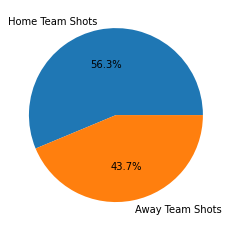

In [ ]:
# No. of Home Team shots vs Away team shots

labels=["Home Team Shots","Away Team Shots"]
sizes=[sum(df.HS),sum(df.AS)]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x1e57391e3b0>,
 [Text(0.04328928347125159, 1.0991478690042327, 'Home Team Fouls'),
  Text(-0.04328928347125172, -1.0991478690042327, 'Away Team Fouls')],
 [Text(0.0236123364388645, 0.5995352012750359, '48.7%'),
  Text(-0.023612336438864574, -0.5995352012750359, '51.3%')])

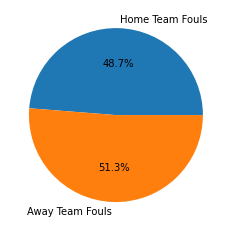

In [ ]:
# No. of Home Team Fouls vs Away team Fouls

labels=["Home Team Fouls","Away Team Fouls"]
sizes=[sum(df.HF),sum(df.AF)]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

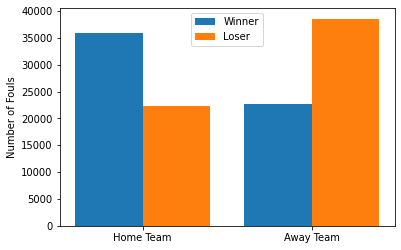

In [ ]:
#

X = ['Home Team','Away Team']
home_win_fouls=df.HF[df.FTHG>df.FTAG].sum()
home_loss_fouls=df.HF[df.FTAG>df.FTHG].sum()
away_win_fouls=df.AF[df.FTAG>df.FTHG].sum()
away_loss_fouls=df.AF[df.FTHG>df.FTAG].sum()

X_axis = np.arange(len(X))

plt.bar(X_axis-0.2, [home_win_fouls,away_win_fouls], 0.4, label = 'Winner')
plt.bar(X_axis+0.2, [home_loss_fouls,away_loss_fouls] , 0.4, label = 'Loser')

plt.xticks(X_axis, X)
plt.ylabel("Number of Fouls")
plt.legend()
plt.show()

In [ ]:
[home_win_fouls,home_loss_fouls,away_win_fouls,away_loss_fouls]

[35995, 22402, 22772, 38591]